<center><h1> Clase 1 NLP </h1></center>

<h2>Flujo de datos en un proyecto de NLP</h2>
<ul>
    <li>Adquisición de datos</li>
    <li>Limpieza de Texto</li>
    <li>Pre-procesamiento</li>
    <li>Creación de características: Elementos que se necesitan para la formulación de los datos que caracteríza los datos.</li>
    <li>Modelo de NLP</li>
    <li>Evaluación de rendimiento del modelo</li>
    <li>Vigilancia y actualización de los datos</li>
    </ul>


<h2>Adquisición de datos</h2><br>
Lugares para obtener datos:
<ul>
    <li>GitHub</li>
    <li>Kaggle: Competencias de Maching Learning</li>
    <li>Google: data set search</li>
    <li>Datos abiertos Colombia o Bogotá</li>
    </ul>
Web Scraping (HTML). <strong> Verificar las reglas de uso de las páginas web. </strong> Esta recolección se puede hacer simulando el comportamiento humano o buscando si la página tiene APIs.<br>   

<h2>Tepaso de HTML. Algunas etiquetas</h2>
<ul>
    <li> Div: Divisor de página.</li>
    <li> p: Párrafo </li>
    <li> a: Links</li>
</ul>
    

<h2>Web Scraping: Uso the beautifull soup y Request</h2>

In [1]:
#Importar librerias Beautifull Soup
import bs4 as bs

In [4]:
#CargarDocumento
ejemplo=bs.BeautifulSoup('<div id="test" class="text" blah="valor">¡Hola, mundo!</div>')
ejemplo

<html><body><div blah="valor" class="text" id="test">¡Hola, mundo!</div></body></html>

In [5]:
ejemplo.find('div')#Encuentra la primera etiqueta
ejemplo.find_all('div')#Encuentra todas, por lo que manda una lista de objetos

[<div blah="valor" class="text" id="test">¡Hola, mundo!</div>]

In [6]:
ejemplo.find_all(id="test")

[<div blah="valor" class="text" id="test">¡Hola, mundo!</div>]

In [8]:
ejemplo.find('div').get('id')#obtener atributos

'test'

In [6]:
ejemplo.find('div').contents #obtener el contenido de la etiqueta con el atributo dado
#Es posible encontrar todas las etiquetas y sobre ese vector buscar el contenido
ejemplo.find_all('div')[0].contents

['¡Hola, mundo!']

In [8]:
list(ejemplo.find("body").children)

[<div blah="valor" class="text" id="test">¡Hola, mundo!</div>]

In [2]:
#IMportar la libreria request
import urllib.request 

In [3]:
link="https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"

In [4]:
request=urllib.request.urlopen(link)
fuente=request.read()
request.close()

In [5]:
soup=bs.BeautifulSoup(fuente,'html.parser')

In [6]:
soup.find('title').contents

['datetime - How to get the current time in Python - Stack Overflow']

In [7]:
for respuesta in soup.find(id="answers").find_all(class_="answer"):
    #En cada respuesta buscar la clase post-text
    for texto in respuesta.find_all(class_="answercell post-layout--right"):
        for parrafo in texto.find_all('p'):
            print(parrafo.contents)
        print("*"*100)
    print()

['Use:']
['And just the time:']
['See ', <a href="https://docs.python.org/3/library/datetime.html" rel="noreferrer"><strong>the documentation</strong></a>, ' for more information.']
['To save typing, you can import the ', <code>datetime</code>, ' object from the ', <code>datetime</code>, ' module:']
['Then remove the leading ', <code>datetime.</code>, ' from all of the above.']
****************************************************************************************************

['You can use ', <a href="http://docs.python.org/3.3/library/time.html?highlight=time.strftime#time.strftime" rel="noreferrer"><code>time.strftime()</code></a>, ':    ']
****************************************************************************************************

['For this example, the output will be like this: ', <code>'2013-09-18 11:16:32'</code>]
['Here is the list of ', <a href="https://docs.python.org/library/datetime.html#strftime-and-strptime-format-codes" rel="noreferrer"><code>strftime</code> d

<h2>Archivos .csv</h2>

In [11]:
import pandas as pd

In [23]:
df=pd.read_csv("archivos/iris.csv") #pd.read_csv?

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
#comandos útiles
len(df.species.str.cat(sep=" ").split())

150

<h2>Archivos .txt, .json, .zip</h2>

<h5> Archivos de texto</h5>

In [29]:
with open("archivos/grabacion.txt") as archivo:
    data=archivo.read()

In [30]:
print(data)

© - Derechos Reservados: La presente obra, y todos sus contenidos, se encuentran protegidos por la normativa nacional e internacional vigente sobre propiedad Intelectual, por lo tanto su utilización parcial o total, reproducción, comunicación pública, transformación, distribución, alquiler, préstamo público e importación, total o parcial, en todo o en parte, en formato impreso o digital y en cualquier formato conocido o por conocer, se encuentran prohibidos, y solo serán lícitos en la medida en que se cuente con la autorización previa y expresa por escrito de la Fundación Universitaria Konrad Lorenz. Así mismo, de acuerdo con la normativa referente al habeas data, la utilización de la imagen de las personas, docentes o estudiantes, sin su previa autorización está expresamente prohibida. En caso de incumplirse con lo mencionado, se procederá de conformidad con los reglamentos de la Institución, sin perjuicio de las demás acciones legales aplicables. 


<h5> Archivos json</h5>

In [31]:
import json

In [32]:
with open("archivos/sistemas_operativos.json") as archivo:
    data=json.load(archivo)

In [33]:
data

[{'Name': 'Debian',
  'Version': '9',
  'Install': 'apt',
  'Owner': 'SPI',
  'Kernel': '4.9'},
 {'Name': 'Ubuntu',
  'Version': '17.10',
  'Install': 'apt',
  'Owner': 'Canonical',
  'Kernel': '4.13'},
 {'Name': 'Fedora',
  'Version': '26',
  'Install': 'dnf',
  'Owner': 'Red Hat',
  'Kernel': '4.13'},
 {'Name': 'CentOS',
  'Version': '7',
  'Install': 'yum',
  'Owner': 'Red Hat',
  'Kernel': '3.10'},
 {'Name': 'OpenSUSE',
  'Version': '42.3',
  'Install': 'zypper',
  'Owner': 'Novell',
  'Kernel': '4.4'},
 {'Name': 'Arch Linux',
  'Version': 'Rolling Release',
  'Install': 'pacman',
  'Owner': 'SPI',
  'Kernel': '4.13'},
 {'Name': 'Gentoo',
  'Version': 'Rolling Release',
  'Install': 'emerge',
  'Owner': 'Gentoo Foundation',
  'Kernel': '4.12'}]

In [34]:
#import from json to pandas
from pandas.io.json import json_normalize

In [36]:
json_normalize(data)

<ipython-input-36-1c283760bfe1>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(data)


,Name,Version,Install,Owner,Kernel
0,Debian,9,apt,SPI,4.9
1,Ubuntu,17.10,apt,Canonical,4.13
2,Fedora,26,dnf,Red Hat,4.13
3,CentOS,7,yum,Red Hat,3.10
4,OpenSUSE,42.3,zypper,Novell,4.4
5,Arch Linux,Rolling Release,pacman,SPI,4.13
6,Gentoo,Rolling Release,emerge,Gentoo Foundation,4.12


<h5> Archivos comprimidos</h5>

In [39]:
import os
from zipfile import ZipFile as zf

In [40]:
direccion="archivos/poemas.zip"

In [41]:
with zf(direccion) as archivo:
    archivo.extractall("archivos/")
    #Dentro de las comillas va la dirección donde quiero mi archivo. 
    #Si lo quiero en el mismo lugar que el notebook se deja el paréntesis sin nada

In [42]:
for file in os.walk("archivos/poemas/"):
    print(file)


('archivos/poemas/', [], ['Si╠ündrome (Mario Benedetti).txt', 'Aqui╠ü (Octavio Paz).txt', 'A un general (Julio Corta╠üzar).txt'])


In [43]:
for raiz, dirs, files in os.walk("archivos/poemas/"):
    for archivo in files:
        print(archivo)

Si╠ündrome (Mario Benedetti).txt
Aqui╠ü (Octavio Paz).txt
A un general (Julio Corta╠üzar).txt


<h5> Archivos de word</h5>

In [44]:
import docx

In [46]:
#cargar archivo
documento=docx.Document("archivos/Colombia.docx")

In [47]:
#leer archivo
for parrafo in documento.paragraphs:
    print(parrafo.text)

Colombia

Colombia, oficialmente República de Colombia, es un país soberano situado en la región noroccidental de América del Sur, que se constituye en un estado unitario, social y democrático d
e derecho cuya forma de gobierno es presidencialista. Es una república organizada políticamente en 32 departamentos descentralizados y el Distrito Capital de Bogotá, sede del Gobierno Nacional.





In [51]:
#lectura de tablas en archivo .docx
tabla=documento.tables[0] #es sólo una tabla no necesita ciclos


In [52]:
tabla.rows

In [56]:
for fila in tabla.rows:
    for celda in fila.cells:
        print(celda.text)

REGION
DEPARTAMENTO
MUNICIPIO
Región Eje Cafetero - Antioquia
Antioquia
Medellín
Región Eje Cafetero - Antioquia
Antioquia
Abejorral
Región Eje Cafetero - Antioquia
Antioquia
Abriaquí
Región Eje Cafetero - Antioquia
Antioquia
Alejandría
Región Eje Cafetero - Antioquia
Antioquia
Amagá
Región Eje Cafetero - Antioquia
Antioquia
Amalfi
Región Eje Cafetero - Antioquia
Antioquia
Andes
Región Eje Cafetero - Antioquia
Antioquia
Angelópolis
Región Eje Cafetero - Antioquia
Antioquia
Angostura
Región Eje Cafetero - Antioquia
Antioquia
Anorí


In [58]:
#Pasar a Pandas
df=[]
for fila in tabla.rows:
    row=[celda.text for celda in fila.cells]
    df.append(row)
df=pd.DataFrame(df)
df        

,0,1,2
0,REGION,DEPARTAMENTO,MUNICIPIO
1,Región Eje Cafetero - Antioquia,Antioquia,Medellín
2,Región Eje Cafetero - Antioquia,Antioquia,Abejorral
3,Región Eje Cafetero - Antioquia,Antioquia,Abriaquí
4,Región Eje Cafetero - Antioquia,Antioquia,Alejandría
5,Región Eje Cafetero - Antioquia,Antioquia,Amagá
6,Región Eje Cafetero - Antioquia,Antioquia,Amalfi
7,Región Eje Cafetero - Antioquia,Antioquia,Andes
8,Región Eje Cafetero - Antioquia,Antioquia,Angelópolis
9,Región Eje Cafetero - Antioquia,Antioquia,Angostura


##### Archivos de Excel

In [59]:
data2=pd.read_excel("archivos/hoja.xlsx")

In [62]:
data2.head()

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,2019-01-06,East,Jones,Pencil,95,1.99,189.05
1,2019-01-23,Central,Kivell,Binder,50,19.99,999.50
2,2019-02-09,Central,Jardine,Pencil,36,4.99,179.64
3,2019-02-26,Central,Gill,Pen,27,19.99,539.73
4,2019-03-15,West,Sorvino,Pencil,56,2.99,167.44


In [ ]:
data3=pd.read_excel("archivos/hoja.xlsx",sheet_n=1)

In [8]:
url="https://docs.google.com/spreadsheets/d/15CGVDsx96eJOivSEdcatWaCOmBO465soHz_gQ_q7LhA/edit?usp=sharing%22"

In [9]:
new_url="https://docs.google.com/spreadsheets/d/15CGVDsx96eJOivSEdcatWaCOmBO465soHz_gQ_q7LhA"+"/gviz/tq?tqx=out:csv"

In [12]:
data3=pd.read_csv(new_url)

In [14]:
data3

,#,Nombre,¿Por qué estás estudiando análitica estratégica de datos?,Sistema Operativo,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,Viviana Márquez,"Me gustan mucho las matemáticas, la programaci...",macOSx,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jorge Gomez,Desarrollo profesional y proyecto personal.,Windows x64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Ilvar Dario Sanabria,Muchas de las decisiones se basan en datos y c...,Windows x64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Camilo Rojas,Trabajo con temas relacionados a gestión de in...,Windows x64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Xiomy Díaz,En mi experiencia en investigación de mercados...,Windows x64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Cindy Naranjo,Me gustan mucho los datos y quiero aprenden co...,Windows x64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Jairo Iván Ordóñez,Me encuentro interesado en aprender diferentes...,Windows x64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Norma Yuliana Cala Martinez,En mi carrera profesional es muy útil y porque...,Windows x64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Jhon Freddy Puentes,Quiero crear productos digitales de alto impac...,macOSx,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Jhonathan Giraldo,Porder aplicar mis conocimientos a mi labor pr...,Windows x64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Archivos PDF</h2>


In [15]:
import PyPDF2 as pdf

In [16]:
#cargar arhivo
archivo=open('archivos/cien.pdf','rb')

In [17]:
lector=pdf.PdfFileReader(archivo)

In [19]:
print(lector.getPage(0).extractText())

Cien aŒos de soledad Muchos aŒos despu”s, frente al pelotŠn de fusilamiento, el coronel Aureliano Buend™a hab™a de 
recordar aquella tarde remota en que su padre lo llevŠ a conocer el hielo. Macondo era entonces 
una aldea de veinte casas de barro y caŒabrava construidas a la orilla de un r™o de aguas di⁄fanas 
que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos 
prehistŠricos. El mundo era tan reciente, que muchas cosas carec™an de nombre, y para 
mencionarlas hab™a que seŒalar™as con el dedo. Todos los aŒos, por el mes de marzo, una familia 
de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y 
timbales daban a conocer los nuevos inventos. Primero llevaron el im⁄n. Un gitano corpulento, de 
barba montaraz y manos de gorriŠn, que se presentŠ con el nombre de Melquiades, hizo una 
truculenta demostraciŠn pœblica de lo que ”l mismo llamaba la octava maravilla de los sabios 
alquimistas de Macedonia. Fue de casa e

<h2> Imagenes</h2>

In [20]:
import pytesseract as ts

In [22]:
from pytesseract import image_to_string

In [24]:
from PIL import Image

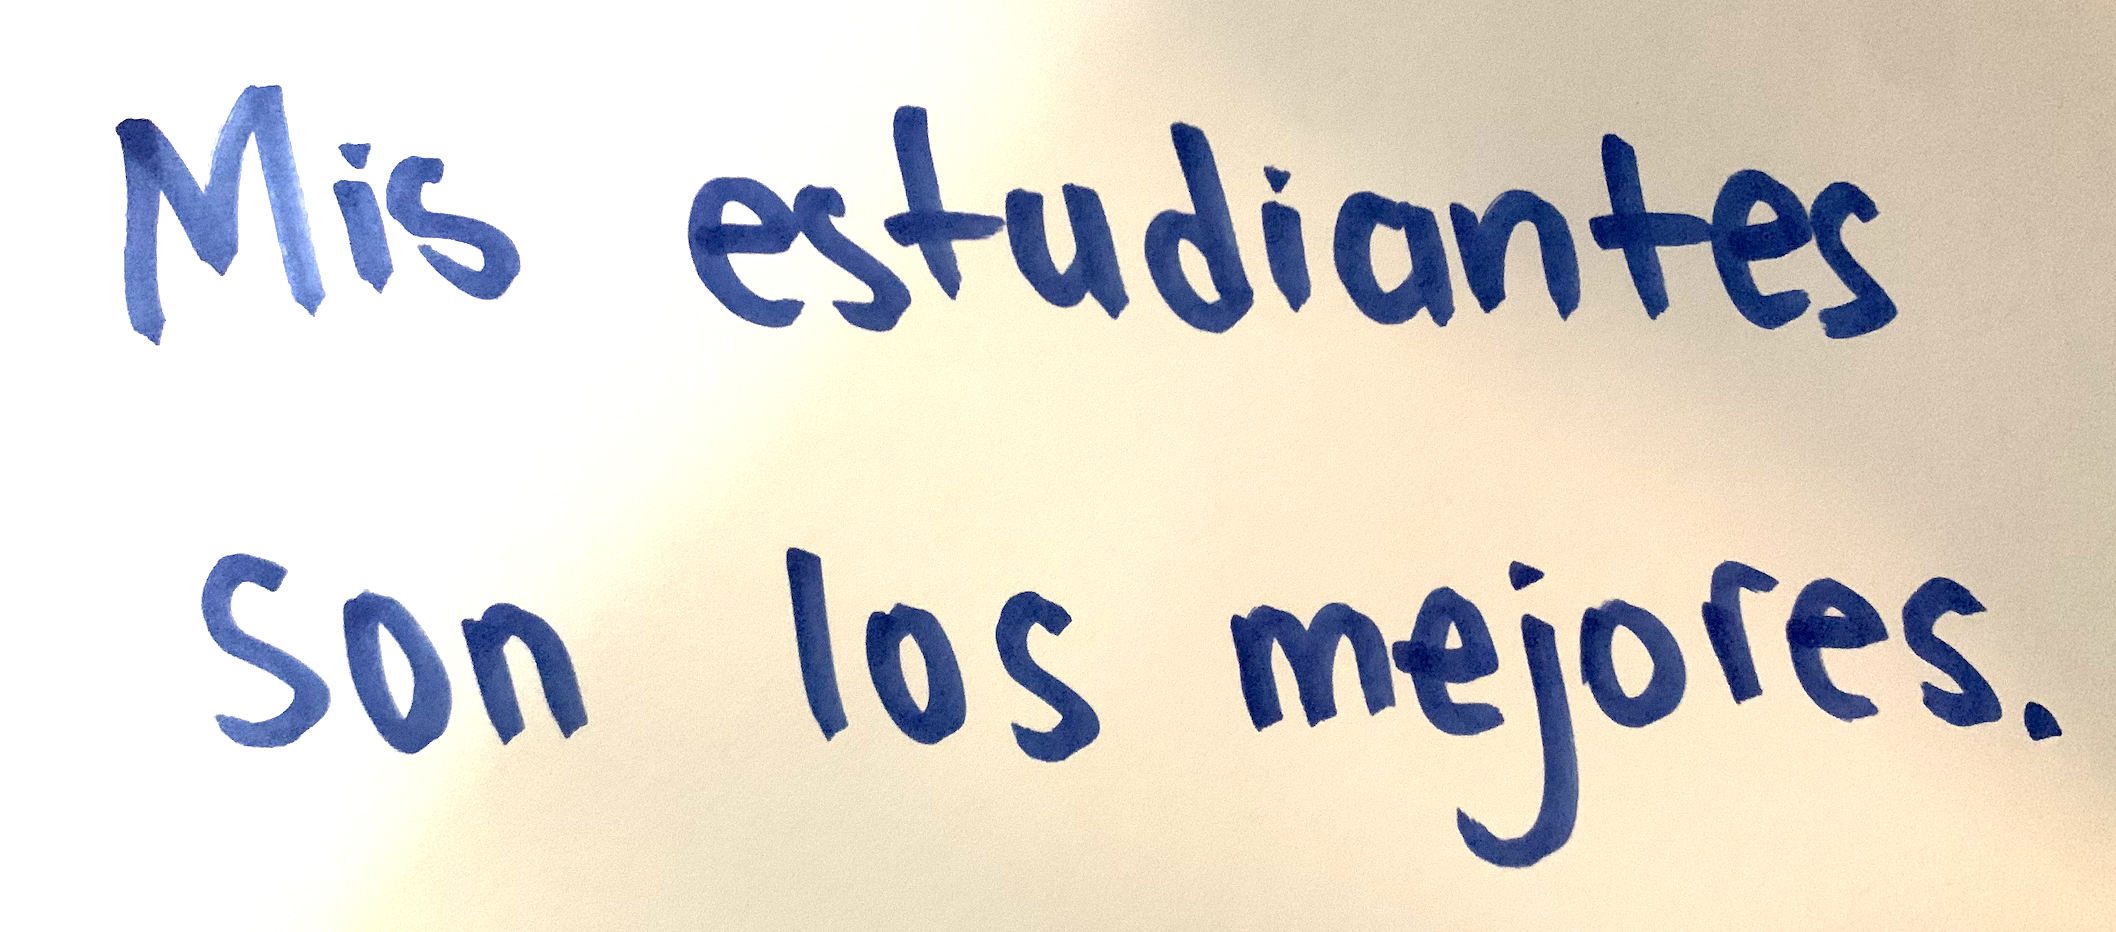

In [25]:
Image.open('archivos/estudiandes2.png')

In [27]:
texto=image_to_string(Image.open('archivos/estudiandes2.png'))
texto

'Nis estudiantes\nSon los mejores,\n\x0c'